In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fakenewsnet/PolitiFactNews.txt
/kaggle/input/fakenewsnet/PolitiFactUser.txt
/kaggle/input/fakenewsnet/BuzzFeedNews.txt
/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv
/kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv
/kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv
/kaggle/input/fakenewsnet/BuzzFeedUserFeature.mat
/kaggle/input/fakenewsnet/BuzzFeedNewsUser.txt
/kaggle/input/fakenewsnet/BuzzFeedUser.txt
/kaggle/input/fakenewsnet/PolitiFactUserUser.txt
/kaggle/input/fakenewsnet/BuzzFeedUserUser.txt
/kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv
/kaggle/input/fakenewsnet/PolitiFactUserFeature.mat
/kaggle/input/fakenewsnet/PolitiFactNewsUser.txt


In [41]:

import matplotlib.pyplot as plt
import cv2
import requests
import numpy as np
import seaborn as sns
import warnings
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# new libraries added later --> to see .mat files
import scipy.io
import json
from scipy.sparse import coo_matrix
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import pandas as pd

In [5]:
df = pd.read_csv("/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv")
df.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com/2016/09/27/trump-ju...,http://occupydemocrats.com/wp-content/uploads/...,"Brett Bose,Grant Stern,Steve Bernstein,Natalie...",http://occupydemocrats.com,{'$date': 1474934400000},NaN,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,"{""generator"": ""Powered by Visual Composer - dr..."
1,Real_10-Webpage,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,http://rightwingnews.com/wp-content/uploads/20...,NaN,http://rightwingnews.com,{'$date': 1474948336000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/top-news/famous-dog-k...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
2,Real_100-Webpage,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,http://cnn.it/2deaH2d,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,"Tom Lobianco,Deirdre Walsh",http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/17050...,http://www.cnn.com/2016/09/22/politics/bryan-p...,"{""description"": ""Members of the House Oversigh..."


In [6]:
df = pd.read_csv("/kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv")
df.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com/2016/09/27/trump-ju...,http://occupydemocrats.com/wp-content/uploads/...,"Brett Bose,Grant Stern,Steve Bernstein,Natalie...",http://occupydemocrats.com,{'$date': 1474934400000},NaN,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,"{""generator"": ""Powered by Visual Composer - dr..."
1,Real_10-Webpage,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,http://rightwingnews.com/wp-content/uploads/20...,NaN,http://rightwingnews.com,{'$date': 1474948336000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/top-news/famous-dog-k...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
2,Real_100-Webpage,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,http://cnn.it/2deaH2d,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,"Tom Lobianco,Deirdre Walsh",http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/17050...,http://www.cnn.com/2016/09/22/politics/bryan-p...,"{""description"": ""Members of the House Oversigh..."


In [7]:
df = pd.read_csv("/kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv")
df.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",http://eaglerising.com/36942/another-terrorist...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Leonora Cravotta",http://eaglerising.com,{'$date': 1474528230000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36942/another-terrorist...,"{""description"": ""\u201cWe believe at this poin..."
1,Real_10-Webpage,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,http://abcn.ws/2d4lNn9,http://a.abcnews.com/images/Politics/AP_donald...,"More Candace,Adam Kelsey,Abc News,More Adam",http://abcn.ws,NaN,NaN,http://www.googleadservices.com/pagead/convers...,http://abcnews.go.com/Politics/donald-trump-dr...,"{""fb_title"": ""Trump: Drugs a 'Very, Very Big F..."
2,Real_11-Webpage,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",http://rightwingnews.com/barack-obama/obama-un...,http://rightwingnews.com/wp-content/uploads/20...,Cassy Fiano,http://rightwingnews.com,{'$date': 1474476044000},https://www.youtube.com/embed/ji6pl5Vwrvk,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/barack-obama/obama-un...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."


In [8]:
df = pd.read_csv("/kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv")
df.head(3)

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Fake_1-Webpage,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,http://www.addictinginfo.org/2016/09/19/proof-...,http://addictinginfo.addictinginfoent.netdna-c...,Wendy Gittleson,http://www.addictinginfo.org,{'$date': 1474243200000},NaN,"http://i.imgur.com/JeqZLhj.png,http://addictin...",http://addictinginfo.com/2016/09/19/proof-the-...,"{""publisher"": ""Addicting Info | The Knowledge ..."
1,Fake_10-Webpage,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,http://eaglerising.com/36899/charity-clinton-f...,http://eaglerising.com/wp-content/uploads/2016...,View All Posts,http://eaglerising.com,{'$date': 1474416521000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36899/charity-clinton-f...,"{""description"": ""The possibility that CHAI dis..."
2,Fake_11-Webpage,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,http://eaglerising.com/36880/a-hillary-clinton...,http://eaglerising.com/wp-content/uploads/2016...,"View All Posts,Tony Elliott",http://eaglerising.com,{'$date': 1474416638000},NaN,http://constitution.com/wp-content/uploads/201...,http://eaglerising.com/36880/a-hillary-clinton...,"{""description"": ""Hillary Clinton may be the fi..."


In [9]:
# Load and analyze text files
text_files = {
    'politifact_news': '/kaggle/input/fakenewsnet/PolitiFactNews.txt',
    'politifact_user': '/kaggle/input/fakenewsnet/PolitiFactUser.txt',
    'buzzfeed_news': '/kaggle/input/fakenewsnet/BuzzFeedNews.txt',
    'buzzfeed_news_user': '/kaggle/input/fakenewsnet/BuzzFeedNewsUser.txt',
    'buzzfeed_user': '/kaggle/input/fakenewsnet/BuzzFeedUser.txt',
    'politifact_user_user': '/kaggle/input/fakenewsnet/PolitiFactUserUser.txt',
    'buzzfeed_user_user': '/kaggle/input/fakenewsnet/BuzzFeedUserUser.txt',
    'politifact_news_user': '/kaggle/input/fakenewsnet/PolitiFactNewsUser.txt'
}

def analyze_text_files():
    for name, file_path in text_files.items():
        try:
            with open(file_path, 'r', encoding='utf-8') as f:
                lines = f.readlines()
            
            print(f"\n=== {name.upper()} ===")
            print(f"Total lines: {len(lines)}")
            print(f"First 5 lines: {lines[:5]}")
            
            # Check if it's a relationship file (contains tabs or multiple columns)
            if lines and '\t' in lines[0]:
                print("This appears to be a relationship file (contains tabs)")
                sample_parts = lines[0].strip().split('\t')
                print(f"Number of columns: {len(sample_parts)}")
                print(f"Sample row parts: {sample_parts}")
            
            print("-" * 50)
        except Exception as e:
            print(f"Error loading {name}: {e}")

analyze_text_files()


=== POLITIFACT_NEWS ===
Total lines: 240
First 5 lines: ['PolitiFact_Real_1\n', 'PolitiFact_Real_2\n', 'PolitiFact_Real_3\n', 'PolitiFact_Real_4\n', 'PolitiFact_Real_5\n']
--------------------------------------------------

=== POLITIFACT_USER ===
Total lines: 23865
First 5 lines: ['f4b46be21c2f553811cc8a73c4f0ff05\n', '2ced3734cc9c164edd9a8f5fbebe976f\n', 'c84c4ea8ba67211f84781bdd64cafe43\n', '1776d1765f5e82cd660d8d502f227402\n', '4e8c2c300d96929895ce0edba915af16\n']
--------------------------------------------------

=== BUZZFEED_NEWS ===
Total lines: 182
First 5 lines: ['BuzzFeed_Real_1\n', 'BuzzFeed_Real_2\n', 'BuzzFeed_Real_3\n', 'BuzzFeed_Real_4\n', 'BuzzFeed_Real_5\n']
--------------------------------------------------

=== BUZZFEED_NEWS_USER ===
Total lines: 22779
First 5 lines: ['45\t1\t1\n', '127\t2\t1\n', '115\t3\t1\n', '180\t3\t1\n', '140\t4\t1\n']
This appears to be a relationship file (contains tabs)
Number of columns: 3
Sample row parts: ['45', '1', '1']
---------------

In [10]:
# Load and analyze .mat files containing user features
mat_files = {
    'buzzfeed_user_features': '/kaggle/input/fakenewsnet/BuzzFeedUserFeature.mat',
    'politifact_user_features': '/kaggle/input/fakenewsnet/PolitiFactUserFeature.mat'
}

def analyze_mat_files():
    for name, file_path in mat_files.items():
        try:
            mat_data = scipy.io.loadmat(file_path)
            print(f"\n=== {name.upper()} ===")
            print(f"Keys in .mat file: {list(mat_data.keys())}")
            
            # Remove MATLAB metadata keys
            data_keys = [key for key in mat_data.keys() if not key.startswith('__')]
            for key in data_keys:
                data = mat_data[key]
                print(f"\nKey: {key}")
                print(f"Type: {type(data)}")
                print(f"Shape: {data.shape if hasattr(data, 'shape') else 'N/A'}")
                print(f"Sample data: {data[:3] if hasattr(data, '__len__') else data}")
            
            print("-" * 50)
        except Exception as e:
            print(f"Error loading {name}: {e}")

analyze_mat_files()

            


=== BUZZFEED_USER_FEATURES ===
Keys in .mat file: ['__header__', '__version__', '__globals__', 'X']

Key: X
Type: <class 'scipy.sparse._coo.coo_matrix'>
Shape: (15257, 109626)
Error loading buzzfeed_user_features: 'coo_matrix' object is not subscriptable

=== POLITIFACT_USER_FEATURES ===
Keys in .mat file: ['__header__', '__version__', '__globals__', 'X']

Key: X
Type: <class 'scipy.sparse._coo.coo_matrix'>
Shape: (23865, 154348)
Error loading politifact_user_features: 'coo_matrix' object is not subscriptable


In [14]:
# Load the datasets
def load_data():
    """Load all the FakeNewsNet dataset files"""
    
    # Load BuzzFeed data
    try:
        buzzfeed_fake = pd.read_csv('/kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv')
        buzzfeed_real = pd.read_csv('/kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv')
        print(f"BuzzFeed Fake News: {len(buzzfeed_fake)} articles")
        print(f"BuzzFeed Real News: {len(buzzfeed_real)} articles")
    except Exception as e:
        print(f"Error loading BuzzFeed data: {e}")
     # Load PolitiFact data
    try:
        politifact_fake = pd.read_csv('/kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv')
        politifact_real = pd.read_csv('/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv')
        print(f"PolitiFact Fake News: {len(politifact_fake)} articles")
        print(f"PolitiFact Real News: {len(politifact_real)} articles")
    except Exception as e:
        print(f"Error loading PolitiFact data: {e}")
    
    return buzzfeed_fake, buzzfeed_real, politifact_fake, politifact_real

# Load all datasets
buzzfeed_fake, buzzfeed_real, politifact_fake, politifact_real = load_data()

BuzzFeed Fake News: 91 articles
BuzzFeed Real News: 91 articles
PolitiFact Fake News: 120 articles
PolitiFact Real News: 120 articles


In [15]:
def preprocess_data(fake_df, real_df, source_name):
    """Preprocess and combine fake and real news data"""
    
    # Add labels
    fake_df = fake_df.copy()
    real_df = real_df.copy()
    
    fake_df['label'] = 0  # Fake news
    real_df['label'] = 1  # Real news
    fake_df['source_type'] = source_name
    real_df['source_type'] = source_name
    
    # Combine datasets
    combined_df = pd.concat([fake_df, real_df], ignore_index=True)
    
    # Basic cleaning
    if 'title' in combined_df.columns:
        combined_df['title'] = combined_df['title'].fillna('')
    if 'text' in combined_df.columns:
        combined_df['text'] = combined_df['text'].fillna('')
    print(f"\n{source_name} Dataset Overview:")
    print(f"Total articles: {len(combined_df)}")
    print(f"Fake news: {len(fake_df)} ({len(fake_df)/len(combined_df)*100:.1f}%)")
    print(f"Real news: {len(real_df)} ({len(real_df)/len(combined_df)*100:.1f}%)")
    
    return combined_df

# Preprocess both datasets
buzzfeed_combined = preprocess_data(buzzfeed_fake, buzzfeed_real, 'BuzzFeed')
politifact_combined = preprocess_data(politifact_fake, politifact_real, 'PolitiFact')

# Combine all data
all_data = pd.concat([buzzfeed_combined, politifact_combined], ignore_index=True)
print(f"\nCombined Dataset: {len(all_data)} total articles")




BuzzFeed Dataset Overview:
Total articles: 182
Fake news: 91 (50.0%)
Real news: 91 (50.0%)

PolitiFact Dataset Overview:
Total articles: 240
Fake news: 120 (50.0%)
Real news: 120 (50.0%)

Combined Dataset: 422 total articles


In [16]:
# Basic statistics
def dataset_overview():
    """Provide comprehensive dataset overview"""
    
    print("=== FAKENEWSNET DATASET ANALYSIS ===\n")
    
    # Overall statistics
    print("📊 Dataset Overview:")
    print(f"Total articles: {len(all_data):,}")
    print(f"Sources: {all_data['source_type'].nunique()}")
    print(f"Fake news: {sum(all_data['label'] == 0):,} ({sum(all_data['label'] == 0)/len(all_data)*100:.1f}%)")
    print(f"Real news: {sum(all_data['label'] == 1):,} ({sum(all_data['label'] == 1)/len(all_data)*100:.1f}%)")
    
    # Missing values analysis
    print(f"\n📋 Data Quality:")
    missing_data = all_data.isnull().sum()
    for col, missing in missing_data.items():
        if missing > 0:
            print(f"{col}: {missing:,} missing ({missing/len(all_data)*100:.1f}%)")
    
    print(f"\nColumns available: {list(all_data.columns)}")

dataset_overview()

=== FAKENEWSNET DATASET ANALYSIS ===

📊 Dataset Overview:
Total articles: 422
Sources: 2
Fake news: 211 (50.0%)
Real news: 211 (50.0%)

📋 Data Quality:
url: 12 missing (2.8%)
top_img: 14 missing (3.3%)
authors: 67 missing (15.9%)
source: 12 missing (2.8%)
publish_date: 127 missing (30.1%)
movies: 383 missing (90.8%)
images: 14 missing (3.3%)
canonical_link: 22 missing (5.2%)

Columns available: ['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data', 'label', 'source_type']


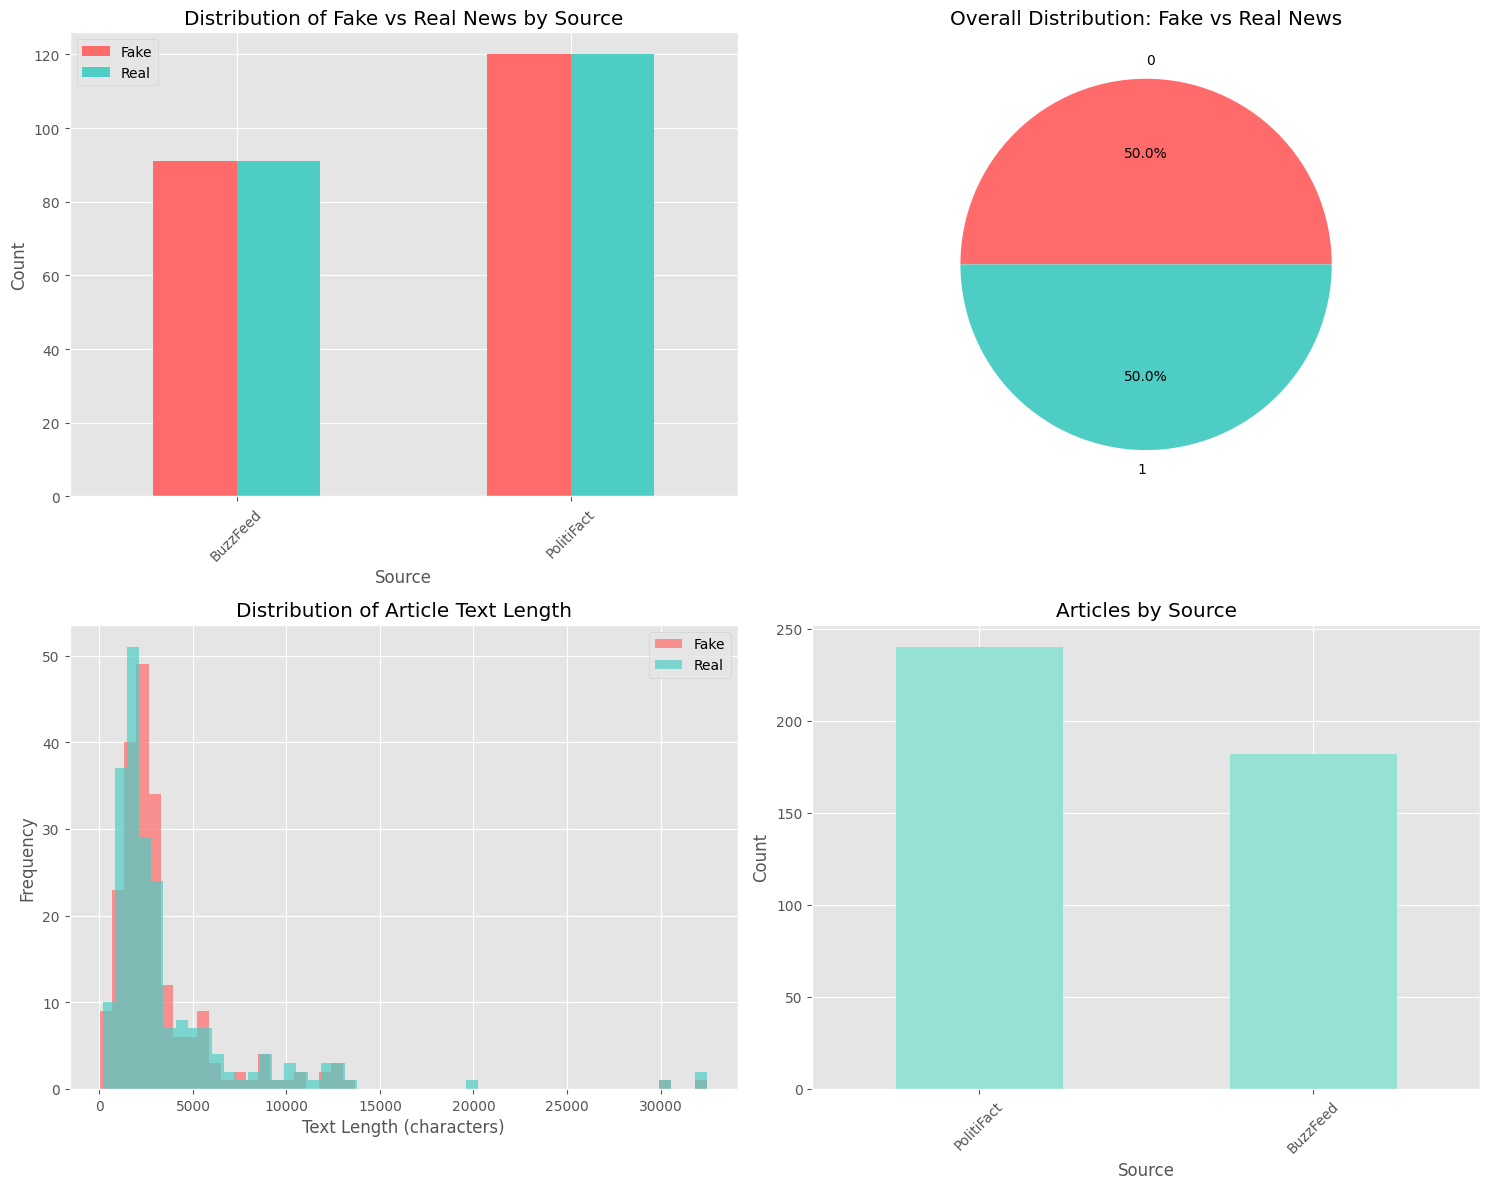

In [19]:
# Create visualizations
def create_visualizations(all_data):
    """Create comprehensive visualizations"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Distribution by source and label
    label_source = pd.crosstab(all_data['source_type'], all_data['label'])
    label_source.plot(kind='bar', ax=axes[0,0], color=['#FF6B6B', '#4ECDC4'])
    axes[0,0].set_title('Distribution of Fake vs Real News by Source')
    axes[0,0].set_xlabel('Source')
    axes[0,0].set_ylabel('Count')
    axes[0,0].legend(['Fake', 'Real'])
    axes[0,0].tick_params(axis='x', rotation=45)
     # 2. Overall distribution
    all_data['label'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', 
                                         colors=['#FF6B6B', '#4ECDC4'])
    axes[0,1].set_title('Overall Distribution: Fake vs Real News')
    axes[0,1].set_ylabel('')
    
    # 3. Text length analysis (if text column exists)
    if 'text' in all_data.columns:
        all_data['text_length'] = all_data['text'].str.len()
        fake_lengths = all_data[all_data['label'] == 0]['text_length']
        real_lengths = all_data[all_data['label'] == 1]['text_length']
        
        axes[1,0].hist(fake_lengths.dropna(), alpha=0.7, label='Fake', bins=50, color='#FF6B6B')
        axes[1,0].hist(real_lengths.dropna(), alpha=0.7, label='Real', bins=50, color='#4ECDC4')
        axes[1,0].set_title('Distribution of Article Text Length')
        axes[1,0].set_xlabel('Text Length (characters)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
    
    # 4. Source comparison
    source_counts = all_data['source_type'].value_counts()
    source_counts.plot(kind='bar', ax=axes[1,1], color='#95E1D3')
    axes[1,1].set_title('Articles by Source')
    axes[1,1].set_xlabel('Source')
    axes[1,1].set_ylabel('Count')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

create_visualizations(all_data)

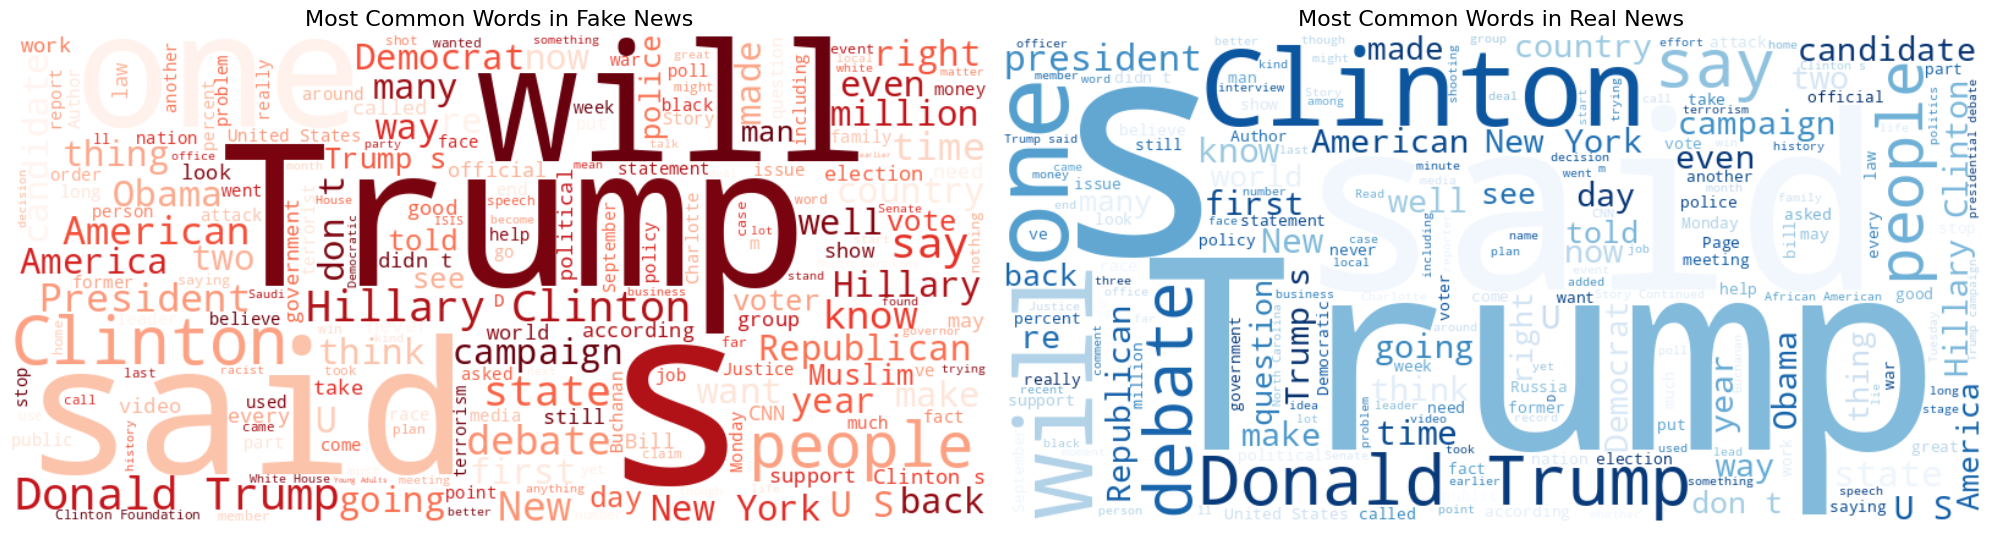

In [18]:
def text_analysis():
    """Perform text analysis and create word clouds"""
    
    # Combine text fields if available
    text_columns = ['title', 'text', 'content']  # Adjust based on your dataset columns
    available_text_cols = [col for col in text_columns if col in all_data.columns]
    
    if available_text_cols:
        # Create combined text
        all_data['combined_text'] = all_data[available_text_cols].fillna('').agg(' '.join, axis=1)
        
        # Separate fake and real news text
        fake_text = ' '.join(all_data[all_data['label'] == 0]['combined_text'].dropna())
        real_text = ' '.join(all_data[all_data['label'] == 1]['combined_text'].dropna())
        
        # Create word clouds
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
         # Fake news word cloud
        if fake_text:
            fake_wordcloud = WordCloud(width=800, height=400, 
                                     background_color='white',
                                     colormap='Reds').generate(fake_text)
            axes[0].imshow(fake_wordcloud, interpolation='bilinear')
            axes[0].set_title('Most Common Words in Fake News', fontsize=16)
            axes[0].axis('off')
        
        # Real news word cloud
        if real_text:
            real_wordcloud = WordCloud(width=800, height=400, 
                                     background_color='white',
                                     colormap='Blues').generate(real_text)
            axes[1].imshow(real_wordcloud, interpolation='bilinear')
            axes[1].set_title('Most Common Words in Real News', fontsize=16)
            axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        return fake_text, real_text
    else:
        print("No text columns found for analysis")
        return None, None

fake_text, real_text = text_analysis()
        
 

In [20]:
import pandas as pd

all_data = all_data.drop(columns=["movies"], errors="ignore")

all_data["authors"] = all_data["authors"].fillna("Unknown")
all_data["source"] = all_data["source"].fillna("Unknown")
all_data["publish_date"] = all_data["publish_date"].fillna("Unknown")
all_data["canonical_link"] = all_data["canonical_link"].fillna("Unknown")

all_data["top_img"] = all_data["top_img"].fillna("no_image")
all_data["images"] = all_data["images"].fillna("no_image")

all_data = all_data.dropna(subset=["url"])

# add new feature column for publish_date (indicator)
all_data["has_date"] = all_data["publish_date"].apply(lambda x: 0 if x=="Unknown" else 1)

# Save cleaned dataset
all_data.to_csv("fakenewsnet_cleaned.csv", index=False)

print(all_data.shape)


(410, 16)


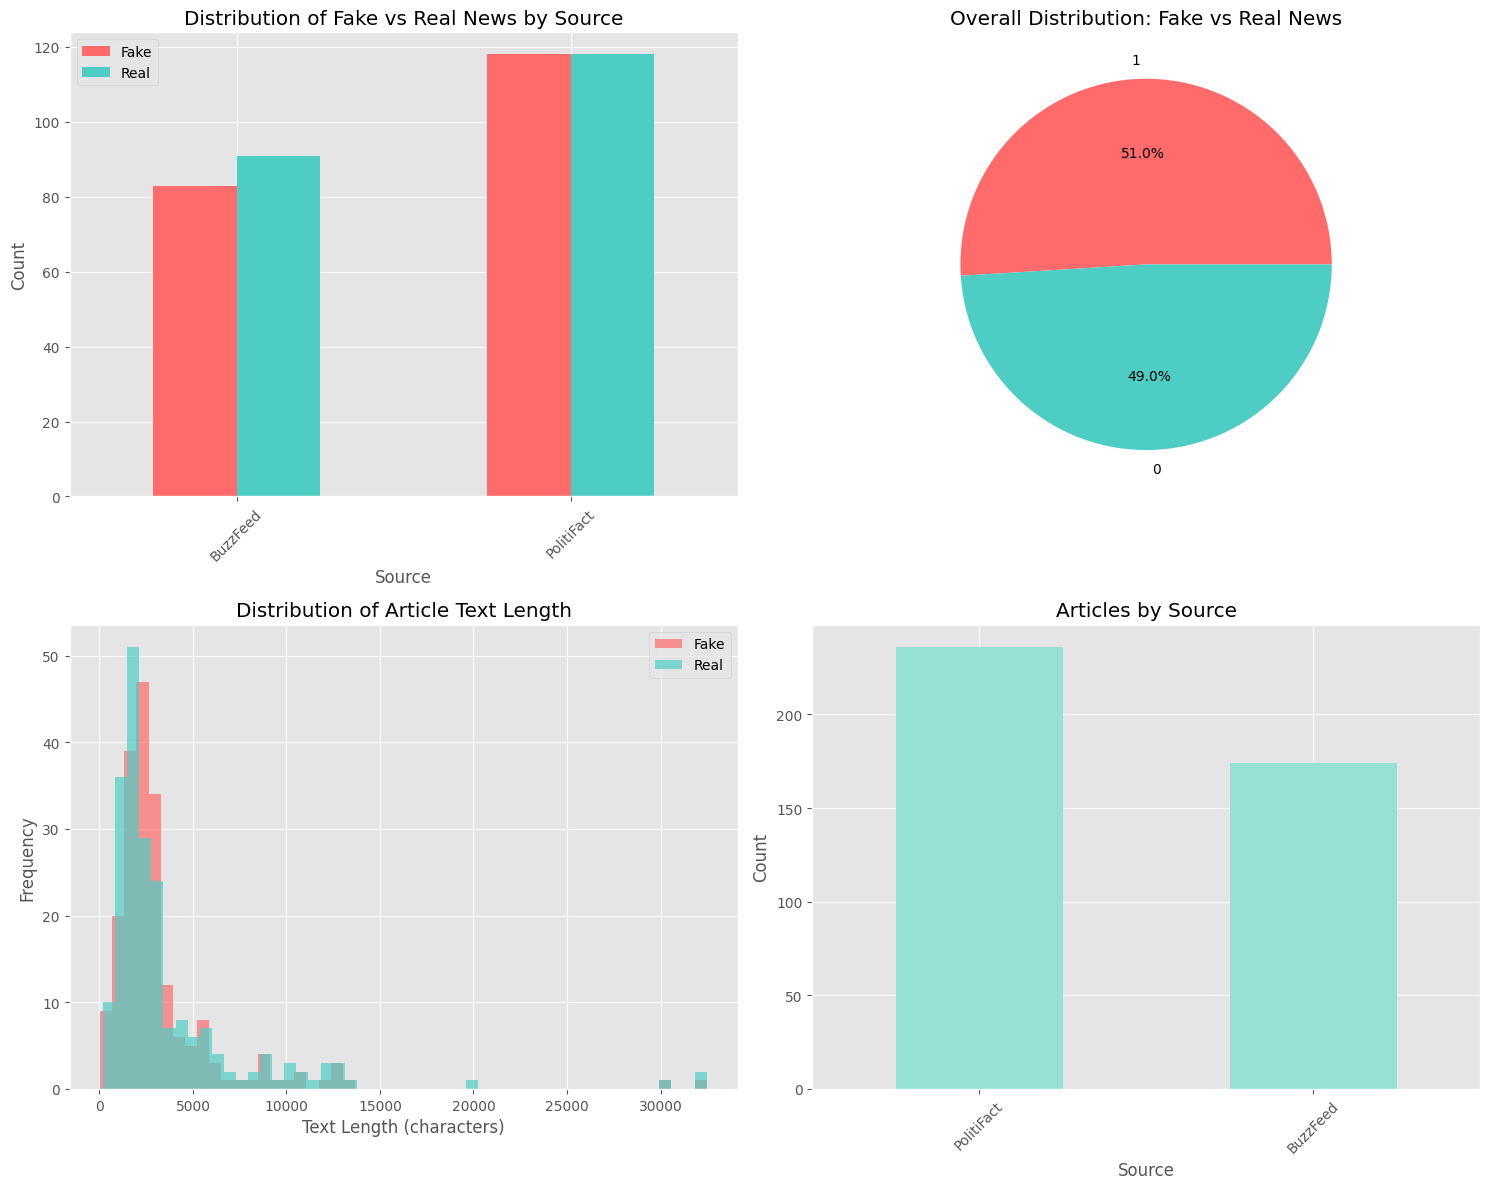

In [21]:
create_visualizations(all_data)

In [24]:
all_data['images'].iloc[0].split(',')

['http://i.imgur.com/JeqZLhj.png',
 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/Screen-Shot-2016-09-19-at-10.28.21-AM.jpg',
 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/GettyImages-605695152.jpg',
 'https://d5nxst8fruw4z.cloudfront.net/atrk.gif?account=Ckvzg1awO700y8',
 'http://i.imgur.com/rUJFIsF.png',
 'http://1.gravatar.com/avatar/7967831c4b263398ad7227f53695cfda?s=70&d=identicon&r=g',
 'http://addictinginfo.com/wp-content/uploads/2013/05/masthead.jpg',
 'http://pixel.quantserve.com/pixel/p-CR_FUckkEtQQm.gif',
 'http://b.scorecardresearch.com/p?c1=2&c2=17503306&cv=2.0&cj=1',
 'http://i.imgur.com/50AezNi.png']

In [49]:
fake_image_urls = []
real_image_urls = []
for img in all_data[all_data['label'] == 0].sample(5)['images'].tolist():
    fake_image_urls.extend(img.split(','))
for img in all_data[all_data['label'] == 1].sample(5)['images'].tolist():
    real_image_urls.extend(img.split(','))
fake_image_urls[:3], real_image_urls[:3]

(['http://static.politico.com/d2/ca/ba3a9b9f4ced82ae0fcdcbaf31a5/160904-gary-johnson-ap-91701597059.jpg',
  'data:image/gif;base64',
  'R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='],
 ['http://i2.cdn.cnn.com/cnnnext/dam/assets/160926111821-arnold-palmer-barack-obama-joe-biden-composite-super-tease.jpg',
  'http://i2.cdn.cnn.com/cnnnext/dam/assets/160926111821-arnold-palmer-barack-obama-joe-biden-composite-large-169.jpg',
  'data:image/gif;base64'])

In [46]:
def show_sample_images(urls):
    downloaded_images = []
    for url in urls:
        if len(downloaded_images) == 5:
            break
        try:
            resp = requests.get(url.strip(), timeout=1)
            resp.raise_for_status()
    
            arr = np.asarray(bytearray(resp.content), dtype=np.uint8)
    
            img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
    
            # Only keep valid images (skip tracking pixels, gifs, etc.)
            if img is not None and img.shape[0] > 30 and img.shape[1] > 30:
                downloaded_images.append((url, img))
    
        except Exception as e:
            pass
    
    print(f"downloaded {len(downloaded_images)} images")

    fig, axes = plt.subplots(1, len(downloaded_images), figsize=(15,5))
    if len(downloaded_images) == 1:
        axes = [axes]
    
    for ax, (url, img) in zip(axes, downloaded_images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis("off")
        ax.set_title(url[:10]+'...')  # show part of filename
    
    plt.show()

Fake images:
downloaded 4 images


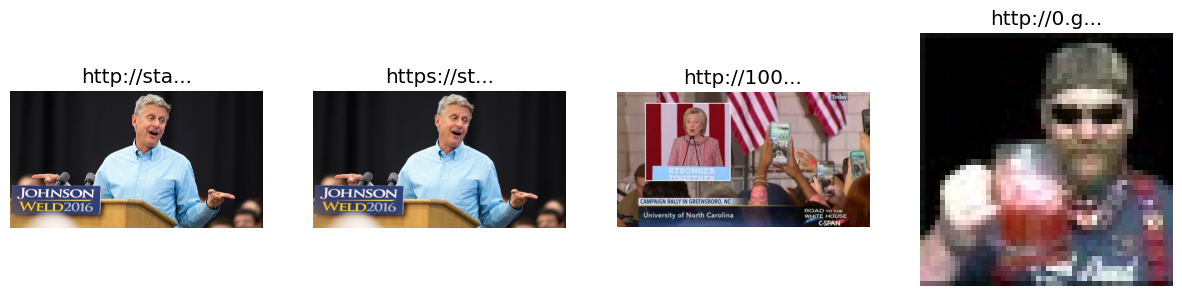

Real images:


libpng warning: iCCP: known incorrect sRGB profile


downloaded 5 images


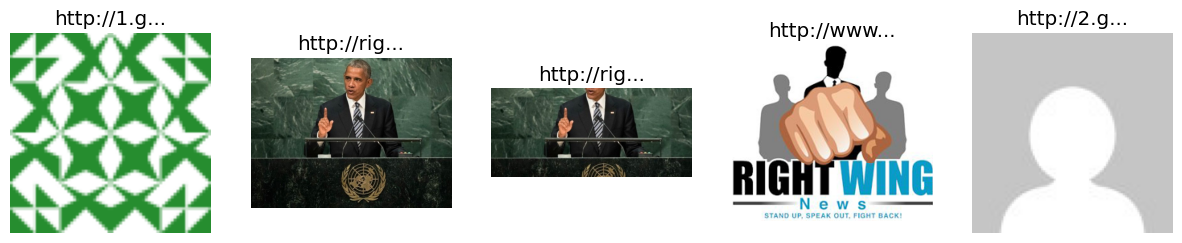

In [50]:
print('Fake images:')
show_sample_images(fake_image_urls)
print('Real images:')
show_sample_images(real_image_urls)

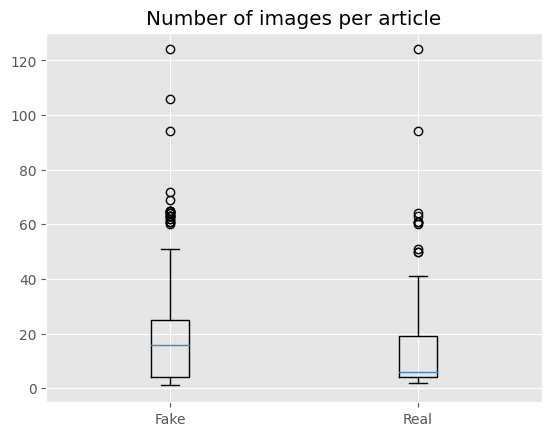

In [51]:
all_data['num_images'] = all_data['images'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

plt.boxplot([all_data[all_data['label']==0]['num_images'],
             all_data[all_data['label']==1]['num_images']],
            labels=['Fake','Real'])
plt.title("Number of images per article")
plt.show()